In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pyiast



## Adsoorption using AiiDAlab
# Question 1:

AiiDAlab provides multiple ways to study adsorption. The three main type of calculation AiiDAlab uses are: XX, XX and XX

# Question 2:




In [8]:
data = {'Probe radius[A]': [1.525] ,'Density[g/cm^3]':[0.576983], 'Accesible Surface Area[A^2]':[0.0], 'Accessible preocupable volume [A^3]': [13428.1] , 'Porosity': [0.0]}

values= pd.DataFrame(data)
print(values)


   Probe radius[A]  Density[g/cm^3]  Accesible Surface Area[A^2]  \
0            1.525         0.576983                          0.0   

   Accessible preocupable volume [A^3]  Porosity  
0                              13428.1       0.0  


# Question 3

In [10]:
Henry_Co={'molecules': ["CO_2","CH_4"],'Henry coefficients at 300k[mol/kg/Pa]':[0.0, 1.12024e-06]}

henr= pd.DataFrame(Henry_Co)
print(henr)

  molecules  Henry coefficients at 300k[mol/kg/Pa]
0      CO_2                               0.000000
1      CH_4                               0.000001


One can notice that the Henry coefficient for C0_2 is XX than CH_4 at 300 K, this observation comes from the fact that XX. 

# Question 4

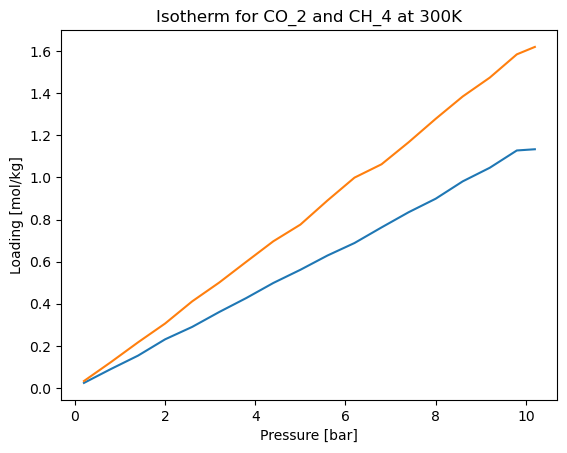

In [41]:
isotherme_ch=dict()
isotherme_co=dict()
with open('CH_4.csv', mode='r', encoding='utf-8') as CH_csv:
    lecteur_CH_csv = csv.reader(CH_csv)

    for index, ligne in enumerate(lecteur_CH_csv):
        if index == 35:
            isotherme_ch = eval(ligne[1])

with open('C0_2.csv', mode='r', encoding='utf-8') as CO_csv:
    lecteur_CO_csv = csv.reader(CO_csv)

    for index, ligne in enumerate(lecteur_CO_csv):
        if index == 35:
            isotherme_co = eval(ligne[1])


pressure_x = isotherme_ch['pressure']
adsorption_ch_4 =isotherme_ch['loading_absolute_average']
adsorption_co_2 = isotherme_co['loading_absolute_average']

plt.plot(pressure_x,adsorption_ch_4, label='CH_4')
plt.plot(pressure_x,adsorption_co_2, label='CO_2')
plt.title("Isotherm for CO_2 and CH_4 at 300K")
plt.xlabel("Pressure [bar]")
plt.ylabel("Loading [mol/kg]")

plt.show()

# Question 5


<class 'numpy.float64'>
2 components.
	Partial pressure component 0 = 0.500000
	Partial pressure component 1 = 0.500000
Component  0
	p =  0.5
	p^0 =  1.1916006237002403
	Loading:  0.055554284956372255
	x =  0.4196036742976565
	Spreading pressure =  0.13692736055820073
Component  1
	p =  0.5
	p^0 =  0.8614802986475577
	Loading:  0.07684275625009586
	x =  0.5803963257023435
	Spreading pressure =  0.1369273605582007
2 components.
	Partial pressure component 0 = 0.500000
	Partial pressure component 1 = 0.500000
Component  0
	p =  0.5
	p^0 =  1.1916006237002403
	Loading:  0.055554284956372255
	x =  0.4196036742976565
	Spreading pressure =  0.13692736055820073
Component  1
	p =  0.5
	p^0 =  0.8614802986475577
	Loading:  0.07684275625009586
	x =  0.5803963257023435
	Spreading pressure =  0.1369273605582007
2 components.
	Partial pressure component 0 = 0.500000
	Partial pressure component 1 = 0.500000
Component  0
	p =  0.5
	p^0 =  1.1916006237002403
	Loading:  0.055554284956372255
	x =  0.41

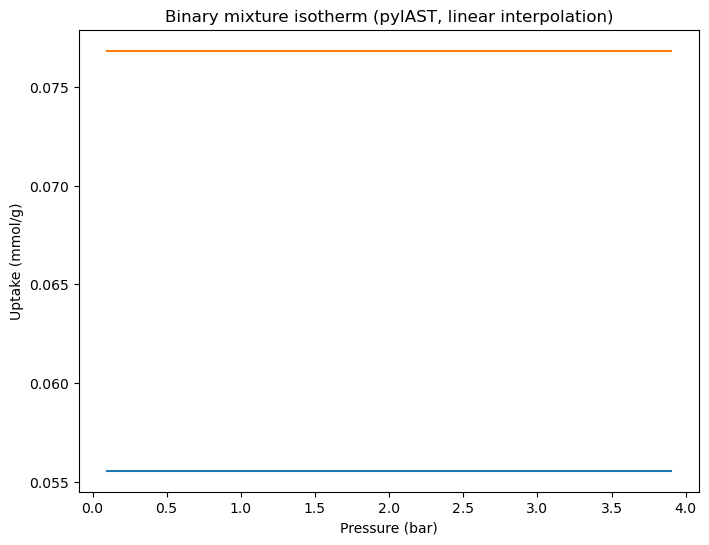

In [59]:
print(type(adsorption_co_2[0]))
ch_panda=pd.DataFrame({"pressuree": pressure_x, "loadings":adsorption_ch_4})
co_panda=pd.DataFrame({"pressuree": pressure_x, "loadings":adsorption_co_2})

isotherm1 = pyiast.InterpolatorIsotherm(ch_panda, loading_key="loadings", pressure_key="pressuree")
isotherm2 = pyiast.InterpolatorIsotherm(co_panda, loading_key="loadings", pressure_key="pressuree")
# === Define binary gas mixture ===
# Example: equimolar feed (50% comp1, 50% comp2)
y = [0.5, 0.5]

# Pressure range: 0.1 to 4.0, step 0.2
P_range = np.arange(0.1, 4.01, 0.2)

# Store mixture adsorption results
mixture_loadings_chuptake= []
mixture_loadings_couptake= []
mixture_loadings = []

for P in P_range:
    res = pyiast.iast(y, [isotherm1, isotherm2], P)
    mixture_loadings_chuptake.append(res[0])
    mixture_loadings_couptake.append(res[1])
    mixture_loadings.append(res)

mixture_loadings = np.array(mixture_loadings)

# === Plot results ===
plt.figure(figsize=(8,6))
plt.plot(P_range, mixture_loadings[:,0], label="CH_4 uptake")
plt.plot(P_range, mixture_loadings[:,1], label="C0_2 uptake")
plt.xlabel("Pressure (bar)")
plt.ylabel("Uptake (mmol/g)")
plt.title("Binary mixture isotherm (pyIAST, linear interpolation)")
plt.show()